<a href="https://colab.research.google.com/github/Yog0sh/Tips-prediction-/blob/main/Copy_of_Untitled8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/tips.csv')
df.head()


,week,day,n_peop,bill,tip
0,1,Tuesday,0.67,17.99,2.0000
1,1,Tuesday,1.33,26.05,4.0000
2,1,Tuesday,5.33,79.49,14.3082
3,1,Tuesday,2.67,32.69,5.5000
4,1,Tuesday,1.33,29.97,6.0000


In [ ]:
df.shape


(95, 5)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   week    95 non-null     int64  
 1   day     95 non-null     object 
 2   n_peop  95 non-null     float64
 3   bill    95 non-null     float64
 4   tip     95 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
week,95.0,1.873684,0.802153,1.00,1.000,2.00,3.000,3.0000
n_peop,95.0,2.722737,2.191235,0.67,1.330,2.00,3.665,9.3300
bill,95.0,41.195263,31.398526,4.98,21.005,29.97,53.215,144.1800
tip,95.0,7.338684,5.890313,0.00,3.250,6.00,8.500,25.9524


In [ ]:
df.isnull().sum()


week      0
day       0
n_peop    0
bill      0
tip       0
dtype: int64

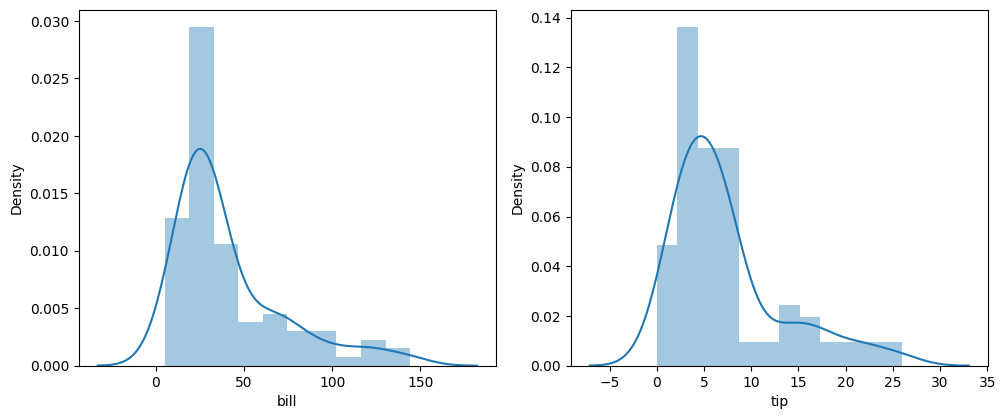

In [ ]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


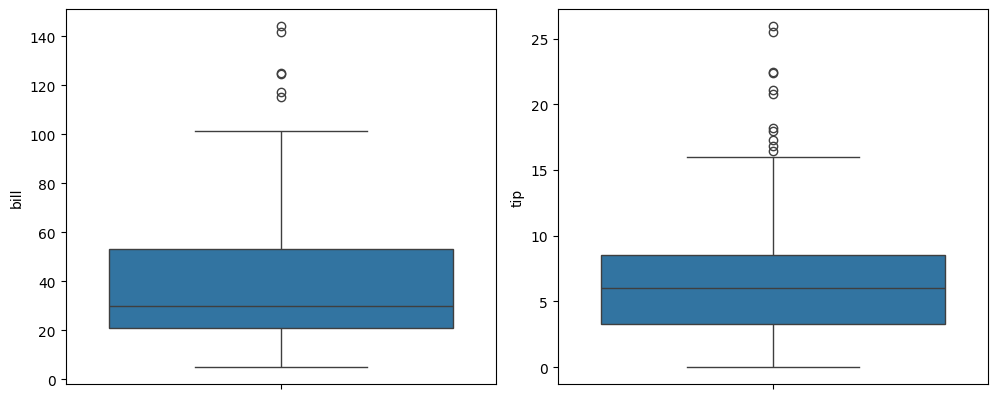

In [ ]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
df.shape, df[(df['bill']<45) & (df['tip']<7)].shape


((95, 5), (56, 5))

In [ ]:
df = df[(df['bill']<45) & (df['tip']<7)]


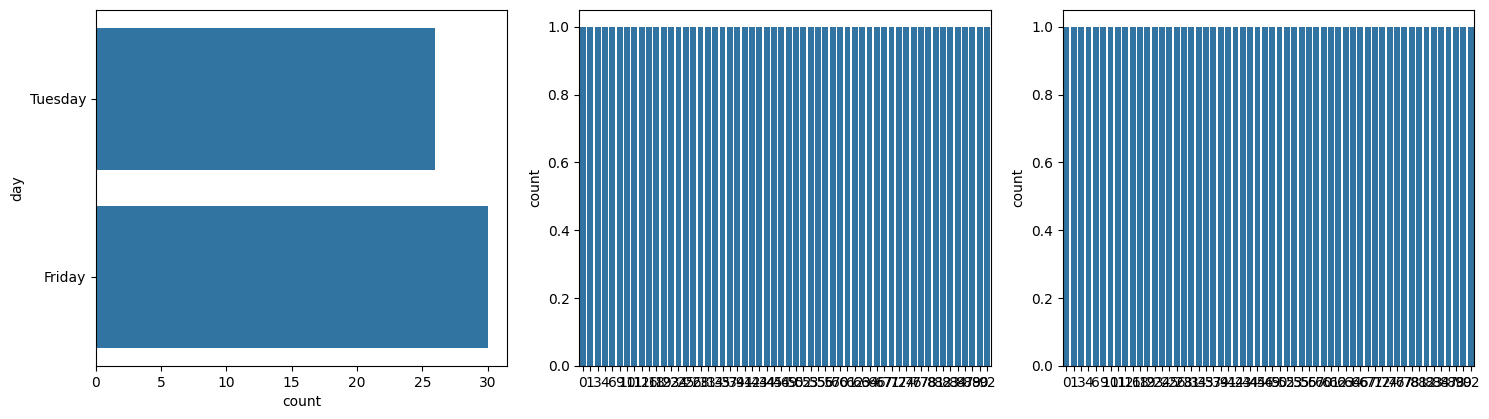

In [ ]:
feat = df.loc[:,'day':'bill'].columns

plt.subplots(figsize=(15,8))
for i, col in enumerate(feat):
  plt.subplot(2,3, i + 1)
  sb.countplot(df[col])
plt.tight_layout()
plt.show()


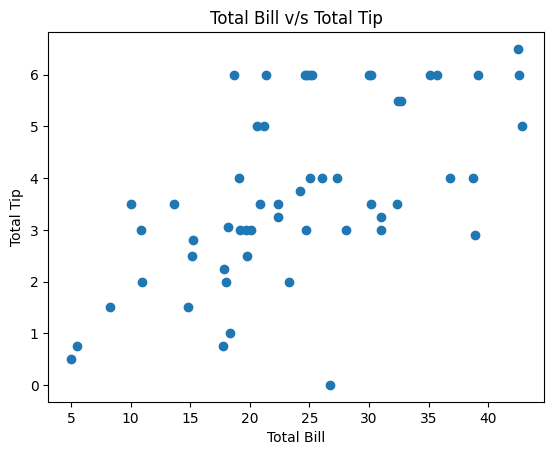

In [ ]:
plt.scatter(df['bill'], df['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()


In [ ]:
df.groupby(['day']).mean()


,week,n_peop,bill,tip
day,,,,
Friday,2.000000,1.622667,25.713667,3.932000
Tuesday,1.769231,1.409231,22.333846,3.492692


In [ ]:
df.groupby(['n_peop']).mean()


,week,bill,tip
n_peop,,,
0.67,2.250000,13.132500,2.421667
1.33,1.640000,22.470000,3.742400
2.00,2.300000,31.380000,4.150000
2.67,1.666667,35.438889,4.961111


In [ ]:
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == object:
	  df[col] = le.fit_transform(df[col])

df.head()


,week,day,n_peop,bill,tip
0,1,1,0.67,17.99,2.00
1,1,1,1.33,26.05,4.00
3,1,1,2.67,32.69,5.50
4,1,1,1.33,29.97,6.00
6,1,1,1.33,18.18,3.06


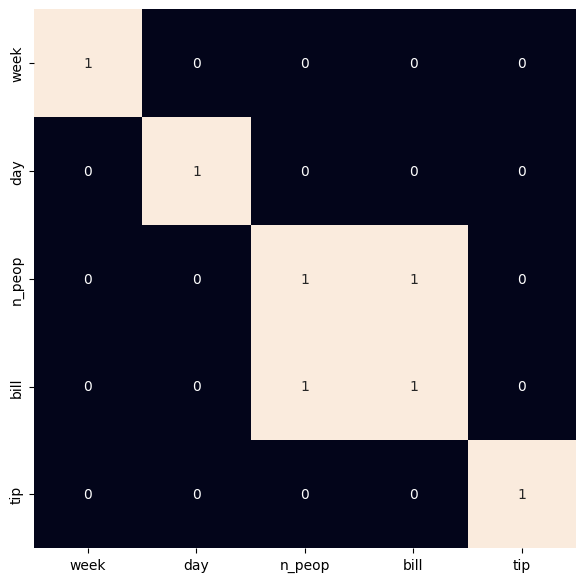

In [ ]:
plt.figure(figsize=(7,7))
sb.heatmap(df.corr() > 0.7, annot = True, cbar = False)
plt.show()


In [ ]:
features = df.drop('tip', axis=1)
target = df['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape


((44, 4), (12, 4))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [ ]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Accuracy : ', mae(Y_train, pred_train))

  pred_val = models[i].predict(X_val)
  print('Validation Accuracy : ', mae(Y_val, pred_val))
  print()


LinearRegression() : 
Training Accuracy :  0.9011290685954747
Validation Accuracy :  1.7171444241646465

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.00135066769339822
Validation Accuracy :  2.0835922161738076

RandomForestRegressor() : 
Training Accuracy :  0.39188863636